# PARTE 2: ANÁLISE EXPLORATÓRIA

In [1]:
# Tarefas a serem executadas:
## Passo 1: Importar bibliotecas
## Passo 2: Importar o banco de dados
## Passo 3: Calcular os parametros da regra dos cinco de Lipink
## Passo 4: Normalizar os valores IC50
## Passo 5: Realizar a análise exploratória propriamente dita
## Passo 6: Tirar insights a partir dos resultados da análsie exploratória

# Passo 1: Importar bibliotecas

In [2]:
!pip install rdkit
import rdkit
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 1.3 MB/s 


# Passo 2: Importar o banco de dados

In [3]:
# Importando a base de dados pré-processada
df = pd.read_csv("/content/dados_preprocessados.csv")
display(df)


,molecule_chembl_id,canonical_smiles,classe_bioatividade,standard_value
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Ativo,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,15.0
...,...,...,...,...
2924,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,3.6
2925,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,1.1
2926,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,1.1
2927,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,34.7


# Passo 3: Calcular os parâmetros da regra dos cinco de Lipink

In [4]:
## 3.1.  Importando bibliotecas
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [5]:
## 3.2. Obtendo os descritores de Lipinsk
# Inspirado em : https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descritores = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descritores

In [6]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,595.704,5.7114,0.0,9.0
1,518.618,4.6494,0.0,8.0
2,581.717,6.5817,0.0,7.0
3,557.181,5.2894,0.0,4.0
4,567.690,6.4076,0.0,7.0
...,...,...,...,...
2924,484.649,2.2485,3.0,8.0
2925,506.573,3.4753,3.0,6.0
2926,484.649,2.2485,3.0,8.0
2927,506.573,3.4753,3.0,6.0


In [7]:
# Fazendo a leitura do dataframe inicial 
df

,molecule_chembl_id,canonical_smiles,classe_bioatividade,standard_value
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Ativo,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,15.0
...,...,...,...,...
2924,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,3.6
2925,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,1.1
2926,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,1.1
2927,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,34.7


In [8]:
## 3.2.  Concatenando as duas base de dados
df_combinado = pd.concat([df,df_lipinski], axis = 1)

In [9]:
display(df_combinado)

,molecule_chembl_id,canonical_smiles,classe_bioatividade,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,335.0,595.704,5.7114,0.0,9.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,28.0,518.618,4.6494,0.0,8.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,10.0,581.717,6.5817,0.0,7.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Ativo,35.0,557.181,5.2894,0.0,4.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,15.0,567.690,6.4076,0.0,7.0
...,...,...,...,...,...,...,...,...
2924,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,3.6,484.649,2.2485,3.0,8.0
2925,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,1.1,506.573,3.4753,3.0,6.0
2926,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,1.1,484.649,2.2485,3.0,8.0
2927,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,34.7,506.573,3.4753,3.0,6.0


In [10]:
## 3.4. Análise descritiva dos valores de IC50 não padronizados
df_combinado.standard_value.describe()

count    2.929000e+03
mean     2.175766e+04
std      3.298531e+05
min      3.000000e-03
25%      3.110000e+00
50%      3.000000e+01
75%      4.500000e+02
max      1.000000e+07
Name: standard_value, dtype: float64

# Passo 4: Normalizar os valores IC50

Para garantir a distribuição normal dos dados, iremos converter os valores de IC50 para escala logarítmica negativa: -log10.
Para isso criaremos a função "pIC50 ()" iremos:
a) Primeiro multiplicar todos valores de IC50 por 10-9, convertendo nM em M. 
b) Segundo: A partir desses resultados (unidade M), calcularemos o "-log10".
Por fim, apagaremos a variável que contem valores de IC50 originais (dados não padronizados) e criaremos uma nova coluna com valores de pIC50.

In [11]:
## 4.1. Criando a função pIC50
# Indpirado em: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [12]:
## Nota Importante:
# Valores maiores que 100.000.000 serão fixados como 100.000.000 
# caso contrário o valor logarítmico negativo se tornará negativo.

In [13]:
-np.log10( (10**-9)* 100000000 )

1.0

In [14]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [15]:
## 4.2 Criando os valores normais padronizados

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [16]:
# Nós iremos primeiro aplicar a função normal_value(), importante descacar que a variável "standar_value" esta normalizada

In [17]:
## 4.3. Visualizando os dados com os valores normais
df_normal = norm_value(df_combinado)
display(df_normal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,molecule_chembl_id,canonical_smiles,classe_bioatividade,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,595.704,5.7114,0.0,9.0,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,518.618,4.6494,0.0,8.0,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,581.717,6.5817,0.0,7.0,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Ativo,557.181,5.2894,0.0,4.0,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,567.690,6.4076,0.0,7.0,15.0
...,...,...,...,...,...,...,...,...
2924,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,484.649,2.2485,3.0,8.0,3.6
2925,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,506.573,3.4753,3.0,6.0,1.1
2926,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,484.649,2.2485,3.0,8.0,1.1
2927,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,506.573,3.4753,3.0,6.0,34.7


In [18]:
## 4.4. Descrevendo o novo Dataframe
df_normal.describe()

,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
count,2929.000000,2929.000000,2929.000000,2929.000000,2.929000e+03
mean,537.494136,5.355210,0.914305,4.741209,2.175766e+04
std,93.286021,1.314201,0.938602,1.565710,3.298531e+05
min,112.176000,-0.574800,0.000000,0.000000,3.000000e-03
25%,492.732000,4.572800,0.000000,4.000000,3.110000e+00
50%,539.720000,5.415800,1.000000,5.000000,3.000000e+01
75%,586.129000,6.210740,1.000000,6.000000,4.500000e+02
max,1225.534000,10.210320,7.000000,16.000000,1.000000e+07


In [19]:
## 4.5. Aplicando a função pI50
df_final = pIC50(df_normal)
display(df_final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,molecule_chembl_id,canonical_smiles,classe_bioatividade,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,595.704,5.7114,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,518.618,4.6494,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,581.717,6.5817,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Ativo,557.181,5.2894,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,567.690,6.4076,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2924,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,484.649,2.2485,3.0,8.0,8.443697
2925,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,506.573,3.4753,3.0,6.0,8.958607
2926,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,484.649,2.2485,3.0,8.0,8.958607
2927,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,506.573,3.4753,3.0,6.0,7.459671


In [20]:
# Salvando o dataset com três classes
df_final.to_csv("dataset_3classes.csv")

In [21]:
## 4.6. Descrevendo o dataframe Final
df_final.pIC50.describe()

count    2929.000000
mean        7.321576
std         1.500807
min         2.000000
25%         6.346787
50%         7.522879
75%         8.507240
max        11.522879
Name: pIC50, dtype: float64

In [22]:
# Agora iremos remover a classe "intermediário" da base de dados final
df_2classes = df_final[df_final.classe_bioatividade != 'Intermediário']
df_2classes

,molecule_chembl_id,canonical_smiles,classe_bioatividade,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,595.704,5.7114,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,518.618,4.6494,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,581.717,6.5817,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Ativo,557.181,5.2894,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Ativo,567.690,6.4076,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2924,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,484.649,2.2485,3.0,8.0,8.443697
2925,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,506.573,3.4753,3.0,6.0,8.958607
2926,CHEMBL4594419,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,484.649,2.2485,3.0,8.0,8.958607
2927,CHEMBL4781426,CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...,Ativo,506.573,3.4753,3.0,6.0,7.459671


# Passo 5: Realizar a análise exploratória propriamente dita: Regra da Pfizer (lipinsk)

In [23]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
## 5.1. Importando as bibliotecas
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Criando o gráfico de frequência das duas classes de compostos (ativos versus inativos)

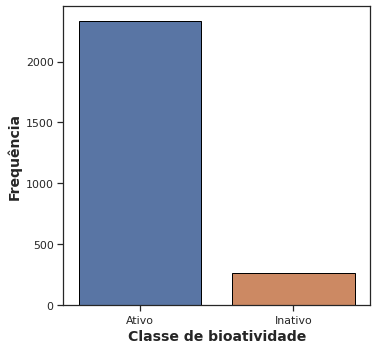

In [26]:
# Construindo o gráfico

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='classe_bioatividade', data=df_2classes, edgecolor='black')
plt.xlabel('Classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold')


## Salvando o gráfico no formato pdf
plt.savefig('plot_bioactivity_class.pdf')

# Criando o scatter plot do peso molecular versus LogP

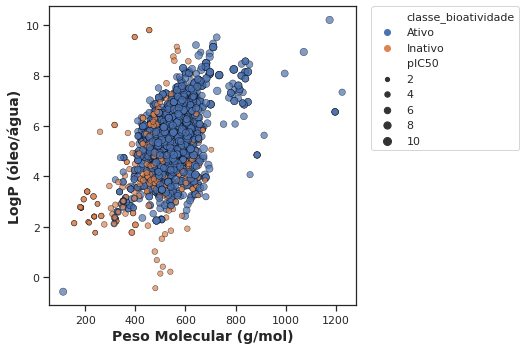

In [27]:
## Criando o scatter plot do peso molecular versus LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='classe_bioatividade', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Peso Molecular (g/mol)', fontsize=14, fontweight='bold')
plt.ylabel('LogP (óleo/água)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Construindo o gráfico de Box Plot de biotividade versus valores de pIC50

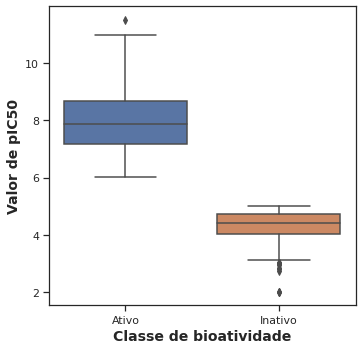

In [28]:
## Construindo o gráfico

plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'classe_bioatividade', y = 'pIC50', data = df_2classes)
plt.xlabel('Classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Valor de pIC50', fontsize=14, fontweight='bold')


## Salvando o gráfico
plt.savefig('plot_ic50.pdf')

# Comparando os dois grupos: estatistica de Mann Witneey

In [29]:
def mannwhitney(descriptor, verbose=False):
  ## Inspirado em: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# Semear o ferador de números aleatórios
  seed(1)

# ativos e inativos
  selection = [descriptor, 'classe_bioatividade']
  df = df_2classes[selection]
  ativo = df[df.classe_bioatividade == 'Ativo']
  ativo = ativo[descriptor]

  selection = [descriptor, 'classe_bioatividade']
  df = df_2classes[selection]
  inativo = df[df.classe_bioatividade == 'Inativo']
  inativo = inativo[descriptor]

# comparar amostras
  stat, p = mannwhitneyu(ativo, inativo)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretar
  alpha = 0.05
  if p > alpha:
    interpretation = 'Mesma distribuição (fail to reject H0)'
  else:
    interpretation = 'Diferentes distribuições (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

## Comparando os valores de pIC50 nas duas classes de compostos: Teste de Mann Witney

In [30]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,623712.0,2.710770e-158,0.05,Diferentes distribuições (reject H0)


In [ ]:
# Agora é só fazer o resto de descritores de lipinsk

## Comparando os valores de peso molecular entre as duas classes de compostos: Teste de Mann Witney

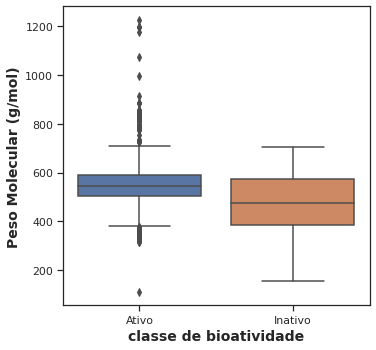

In [31]:
# Peso molecular
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'MW', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Peso Molecular (g/mol)', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [32]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,424236.5,4.467740e-22,0.05,Diferentes distribuições (reject H0)


## Comparando os valores de LogP entre as duas classes de compostos: Teste de Mann Witney

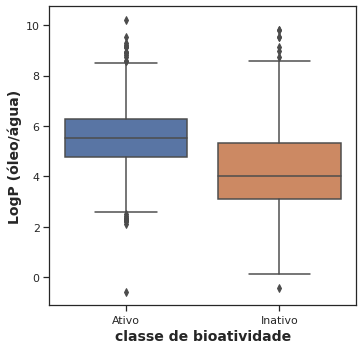

In [33]:
# LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'LogP', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('LogP (óleo/água)', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [34]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,460731.0,1.710051e-37,0.05,Diferentes distribuições (reject H0)


# Comparando o número dos grupos doadores de ligações de pontes de hidrogênio  entre as duas classes de compostos: Teste de Mann Witney

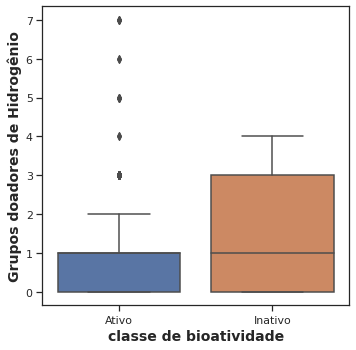

In [35]:
# Grupos doadores de ligações de hidrogénio
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'NumHDonors', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Grupos doadores de Hidrogênio', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [36]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,216892.0,7.810460e-19,0.05,Diferentes distribuições (reject H0)


# Comparando o número dos grupos aceptores de ligações de pontes de hidrogênio entre as duas classes de compostos: Teste de Mann Witney

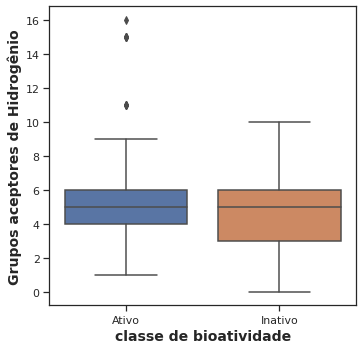

In [37]:
# Grupos aceptores de ligações de hidrogénio
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Grupos aceptores de Hidrogênio', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [38]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,326615.5,0.19302,0.05,Mesma distribuição (fail to reject H0)


# ANÁLISE EXPLORATÓRIA: CONCLUSÕES

In [39]:
# Considerando a análise de pIC50, os valores dos compsotos activos e bioactivos foram estatisticamente diferentes.Esses resultados já eram esperados;
# O threshld foi de 6, ou seja, compostos bioativos: pIC50>6; compostos inactivos: pIC50<6;
# Outros dois descritores de lipinsk (logP, grupos doadores), tambem mostraram resultados semelhantes;
# No entanto, o número de grupos doadores de hidrogênios não foram estatisticamente diferenças  entre as duas classes de compostos (p = 0.193);
# No geral podemos concluir que as duas classes de compostos cumprem as caracteristicas de  drug-likeness propostas pela Farmaêutica Pfizer;
# Uma análise profunda usando modelos de machine learning supervisionados é justificavel.

# Por último, salvando (zipando) todos os arquivos gerados neste Jupyter notebook

In [40]:
! zip -r resultados.zip . -i *.csv *.pdf

  adding: dados_preprocessados.csv (deflated 88%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: dataset_3classes.csv (deflated 83%)
  adding: plot_NumHDonors.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 5%)
  adding: mannwhitneyu_MW.csv (deflated 4%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 6%)
  adding: mannwhitneyu_pIC50.csv (deflated 6%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_MW.pdf (deflated 36%)


In [41]:
# Salvando o dataset_final para futuras análises
df_2classes.to_csv("dataset_2classes.csv")
